In [15]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import njit

c = 0.0256 *20/10**-4
a = (1 * 20 + 0.04 * 440) / 1000
b = (1 * 20 + 0.04 * 50) / 1000
p_x = 0.5
y = 500 / 1000
x_0 = 50 / 1000

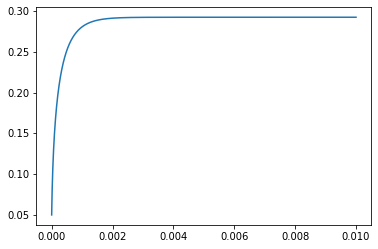

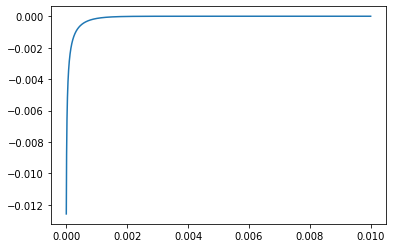

In [17]:


@njit
def func(t, x):
    inside = (a + p_x * y) / (b + p_x * x) * x / y
    return -c * np.log(inside)

@njit
def range_kutta(func, xvals, tvals):
    t = tvals[0]
    x = xvals[0]
    h = tvals[1] - tvals[0]
    for i in range(len(tvals) - 1):
        k1 = h * func(t, x)
        k2 = h * func(t + h / 2, x + k1 / 2)
        k3 = h * func(t + h / 2, x + k2 / 2)
        k4 = h * func(t + h, x + k3)
        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = tvals[i + 1]
        xvals[i + 1] = x
    return xvals
@njit
def V(x):
    return 0.0256 * np.log((a + p_x * y) / y * np.divide(x, (b + p_x * x)))

    # initial conditions
t_min=0
t_max=0.01
n_times=10000
tvals = np.linspace(t_min, t_max, n_times)
xvals = np.zeros(n_times)
xvals[0] = x_0
xvals = range_kutta(func, xvals, tvals)
plt.plot(tvals, xvals)
plt.show()


plt.plot(tvals, V(xvals))
plt.show()